In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.float_format = "{:.2f}".format

In [2]:
def seed_read_results(env_name, files, keys, seeds):
    parent = "results_chessworld/" + env_name + "/"
    final_dfs = {}

    for seed in seeds:
        all_dfs = []
        for file in files:
            cur_name = parent + str(seed) + "/" + file + ".csv"
            cur_df = pd.read_csv(cur_name)
            cur_df.set_index(["Task Set", "Task ID"], inplace=True)
    
            if "Avg Discounted Return" in cur_df.columns:
                cur_df.drop(columns=["Avg Discounted Return"], inplace=True)
    
            all_dfs.append(cur_df)
    
        df_concat = pd.concat(all_dfs, axis=1, keys=keys)
        final_dfs[seed] = df_concat

    df_mean = sum(final_dfs.values()) / len(final_dfs)
    return final_dfs, df_mean

In [3]:
# ChessWorld-v1 new finite tasks and results

tasks_v0 = "eval_datasets/ChessWorld-v1/finite_tasks.txt"

with open(tasks_v0, 'r') as file:
    for line in file:
        print(line[:-1])

Reach
R_1 (F (pawn & F(rook & F(knight))))
R_2 (F ((rook&queen) & (F bishop)))
R_3 (F (bishop & rook) & (F (bishop & knight)))
Avoid 2
A2_1 (!(pawn | bishop) U (bishop & rook)) good
A2_2 (!(queen | pawn) U (rook & queen)) good
A2_3 (!(bishop | pawn) U (rook & knight)) good
A2_4 (! (knight | rook) U bishop)
A2_5 (! (bishop | knight) U queen)
A2_6 (! (rook | bishop) U pawn)
Avoid 3
A3_1 (!(bishop | knight | pawn) U (rook & queen)) good
A3_2 (!(knight | rook | bishop) U (rook & bishop)) alright
A3_3 (!(bishop | pawn | rook) U (rook & queen)) good
A3_4 (!(bishop | knight | queen) U (rook & queen)) good
Avoid 4
A4_1 (!(bishop | rook | knight | pawn) U (queen))
A4_2 (!(bishop | rook | knight | queen) U (pawn))
A4_3 (!(bishop | rook | pawn | queen) U (knight))
A4_4 (!(bishop | knight | pawn | queen) U (rook))
A4_5 (!(rook | knight | pawn | queen) U (bishop))
Avoid 5
A5_1 (!(bishop | rook | knight | pawn | queen) U (queen & pawn))
A5_2 (!(bishop | rook | knight | queen | pawn) U (pawn & rook))

In [4]:
# ChessWorld-v1 infinite tasks and results

tasks_v0 = "eval_datasets/ChessWorld-v1/infinite_tasks.txt"

with open(tasks_v0, 'r') as file:
    for line in file:
        print(line[:-1])

Reach infinite training
RIT_1 (F (G bishop))
RIT_2 (F (G queen))
RIT_3 (F (G rook))
RIT_4 (F (G pawn))
RIT_5 (F (G knight))
RIT_6 (F (G (queen | bishop)))
RIT_7 (F (G (rook | queen)))
RIT_8 (F (G (knight | pawn)))
RIT_9 (F (G (bishop | knight)))
RIT_10 (F (G (rook | pawn)))
Reach avoid always eventually
RAE_1 ((G (F knight)) & (G (F queen)))
RAE_2 ((G (F pawn)) & (G (F rook)))
RAE_3 ((G (F bishop)) & (G (F knight)) & (G (! rook)))
RAE_4 ((G (F rook)) & (G (F pawn)) & (G (! knight)))
Reach stay infinite
RSI_1 (F (G (bishop & !rook)))
RSI_2 (F (G (knight & !bishop)))
RSI_3 (F (G (queen & pawn)))
RSI_4 (F (G (rook & queen)))
RSI_5 (F (G (queen & pawn))


In [5]:
files_finite_seeds = [
                'ChessWorld-v1_deepsets_update_2',
                'ChessWorld-v1_gcn_formula_big_skip_6_finer',
                'ChessWorld-v1_deepsets_formula_update',
                'ChessWorld-v1_gcn_formula_update2',
               ]

keys_seeds = ["Deepsets (cache curriculum)", "GCN (cache curriculum)", "Deepsets (prop curriculum)", 'GCN (prop curriculum)']

dfs_ra, df_ra_mean = seed_read_results("ChessWorld-v1", files_finite_seeds, keys_seeds, list(range(1, 6)))

df_ra_mean

Deepsets (cache curriculum)            \
                                             Successes x/29 Avg Steps   
Task Set                Task ID                                         
Reach                   R_1                           26.80      4.06   
                        R_2                           29.00      4.48   
                        R_3                           28.20      7.08   
Avoid 2                 A2_1                          26.00      4.44   
                        A2_2                          28.20      2.85   
                        A2_3                          23.80      3.27   
                        A2_4                          27.40      1.63   
                        A2_5                          21.40      2.90   
                        A2_6                          27.20      2.77   
Avoid 3                 A3_1                          20.00      3.17   
                        A3_2                          11.80      2.82   
                        A3_3                          24.40      3.00   
                        A3_4                          21.60      3.09   
Avoid 4                 A4_1                          21.00      2.96   
                        A4_2                          23.40      2.80   
                        A4_3                          29.00      1.81   
                        A4_4                          23.40      2.92   
                        A4_5                          26.80      1.56   
Avoid 5                 A5_1                          20.80      3.10   
                        A5_2                          20.20      3.20   
                        A5_3                          15.60      2.15   
                        A5_4                           6.20      1.99   
                        A5_5                           3.00      1.90   
                        A5_6                          20.00      3.19   
Reach Avoid General     RA_1                          28.80      3.19   
                        RA_2                          22.40      3.36   
                        RA_3                          27.20      3.57   
                        RA_4                          29.00      3.04   
                        RA_5                          29.00      3.41   
                        RA_6                          26.80      3.15   
                        RA_7                          23.40      4.32   
Reach Avoid X and not Y RXNY_1                        28.00      1.74   
                        RXNY_2                        27.00      1.57   
                        RXNY_3                        21.40      2.90   
                        RXNY_4                        23.40      1.74   
                        RXNY_5                        22.20      2.94   

                                GCN (cache curriculum)            \
                                        Successes x/29 Avg Steps   
Task Set                Task ID                                    
Reach                   R_1                      27.60      4.79   
                        R_2                      29.00      4.71   
                        R_3                      28.80      8.04   
Avoid 2                 A2_1                     26.00      4.43   
                        A2_2                     27.80      3.10   
                        A2_3                     15.40      2.61   
                        A2_4                     28.20      1.64   
                        A2_5                     21.80      2.80   
                        A2_6                     27.80      2.86   
Avoid 3                 A3_1                     18.20      3.15   
                        A3_2                     17.40      3.84   
                        A3_3                     25.20      3.12   
                        A3_4                     19.40      3.10   
Avoid 4                 A4_1                     16.20      2.90   
                        A4_2

In [6]:
df_ra_mean.groupby("Task Set").mean()

Deepsets (cache curriculum)            \
                                     Successes x/29 Avg Steps   
Task Set                                                        
Avoid 2                                       25.67      2.98   
Avoid 3                                       19.45      3.02   
Avoid 4                                       24.72      2.41   
Avoid 5                                       14.30      2.59   
Reach                                         28.00      5.21   
Reach Avoid General                           26.66      3.43   
Reach Avoid X and not Y                       24.40      2.18   

                        GCN (cache curriculum)            \
                                Successes x/29 Avg Steps   
Task Set                                                   
Avoid 2                                  24.50      2.91   
Avoid 3                                  20.05      3.30   
Avoid 4                                  20.84      2.38   
Avoid 5                                  13.73      2.51   
Reach                                    28.47      5.85   
Reach Avoid General                      24.06      3.48   
Reach Avoid X and not Y                  20.44      2.13   

                        Deepsets (prop curriculum)            \
                                    Successes x/29 Avg Steps   
Task Set                                                       
Avoid 2                                      26.77      3.11   
Avoid 3                                      19.95      3.09   
Avoid 4                                      26.44      2.48   
Avoid 5                                      19.47      3.08   
Reach                                        28.73      5.50   
Reach Avoid General                          26.54      3.41   
Reach Avoid X and not Y                      26.64      2.22   

                        GCN (prop curriculum)            
                               Successes x/29 Avg Steps  
Task Set                                                 
Avoid 2                                 27.00      3.11  
Avoid 3                                 23.15      3.44  
Avoid 4                                 26.52      2.44  
Avoid 5                                 21.17      3.15  
Reach                                   28.87      5.12  
Reach Avoid General                     26.91      3.41  
Reach Avoid X and not Y                 26.08      2.24

In [7]:
files_infinite_seeds = [
                'ChessWorld-v1_deepsets_update_2_inf',
                'ChessWorld-v1_gcn_formula_big_skip_6_finer_inf',
                'ChessWorld-v1_deepsets_formula_update_inf',
                'ChessWorld-v1_gcn_formula_update_inf',
               ]

dfs_rs, df_rs_mean = seed_read_results("ChessWorld-v1", files_infinite_seeds, keys_seeds, list(range(1, 6)))

df_rs_mean

Deepsets (cache curriculum)  \
                                                 Accepting visits   
Task Set                      Task ID                               
Reach infinite training       RIT_1                         19.48   
                              RIT_2                         31.93   
                              RIT_3                         36.92   
                              RIT_4                         41.32   
                              RIT_5                          0.00   
                              RIT_6                         35.52   
                              RIT_7                         48.94   
                              RIT_8                         23.81   
                              RIT_9                         17.88   
                              RIT_10                        48.19   
Reach avoid always eventually RAE_1                         38.23   
                              RAE_2                         75.03   
                              RAE_3                         46.83   
                              RAE_4                         62.72   
Reach stay infinite           RSI_1                          8.53   
                              RSI_2                          0.14   
                              RSI_3                         45.08   
                              RSI_4                         23.33   
                              RSI_5                         45.08   

                                      GCN (cache curriculum)  \
                                            Accepting visits   
Task Set                      Task ID                          
Reach infinite training       RIT_1                    66.06   
                              RIT_2                    72.70   
                              RIT_3                    75.06   
                              RIT_4                    70.74   
                              RIT_5                    27.34   
                              RIT_6                    56.99   
                              RIT_7                    61.48   
                              RIT_8                    73.42   
                              RIT_9                    73.48   
                              RIT_10                   75.11   
Reach avoid always eventually RAE_1                    35.94   
                              RAE_2                    66.47   
                              RAE_3                    51.19   
                              RAE_4                    26.95   
Reach stay infinite           RSI_1                    53.81   
                              RSI_2                    13.71   
                              RSI_3                    74.17   
                              RSI_4                    37.99   
                              RSI_5                    74.17   

                                      Deepsets (prop curriculum)  \
                                                Accepting visits   
Task Set                      Task ID                              
Reach infinite training       RIT_1                        25.97   
                              RIT_2                        37.21   
                              RIT_3                        37.01   
                              RIT_4                        38.54   
                              RIT_5                        30.48   
                              RIT_6                        38.14   
                              RIT_7                        34.73   
                              RIT_8                        37.43   
                              RIT_9                        33.26   
                              RIT_10                       38.03   
Reach avoid always eventually RAE_1                        44.04   
                              RAE_2                        55.79   
                              RAE_3                        39.54   
                      

In [8]:
df_rs_mean.groupby("Task Set").mean()

,Deepsets (cache curriculum),GCN (cache curriculum),Deepsets (prop curriculum),GCN (prop curriculum)
,Accepting visits,Accepting visits,Accepting visits,Accepting visits
Task Set,,,,
Reach avoid always eventually,55.71,45.14,51.28,49.22
Reach infinite training,30.40,65.24,35.08,62.31
Reach stay infinite,24.43,50.77,32.64,47.11


In [9]:
def make_latest_ablation_graphs(cols, colors, parent_dir="chessworld8_ablation/stay_update/"):
    all_dfs = [pd.read_csv(parent_dir + str(seed) + "/results.csv", header=[0,1], index_col=0) for seed in range(1, 6)]

    mean_df = pd.concat(all_dfs).groupby(level=0).mean()
    std_df = pd.concat(all_dfs).groupby(level=0).std()

    # print(df_mean)
    
    # labels = ["Deepsets (large avoid)", "Deepsets (15M)", "GCN (15M)", "Deepsets (formula)"]
    # colors = ["purple", "red", "blue", "black"]
    i = 0
    
    for col in cols:
        df_mean = mean_df[col]
        df_std = std_df[col]
        
        plt.plot(df_mean.index, df_mean["successes_mean"], label=col, color=colors[i])  # Mean line
        plt.scatter(df_mean.index, df_mean["successes_mean"], color=colors[i])  # Mean line

        plt.fill_between(df_mean.index,
                         df_mean["successes_mean"] - df_std["successes_mean"],
                         df_mean["successes_mean"] + df_std["successes_mean"],
                         color=colors[i], alpha=0.2)  # Confidence interval

        i += 1

    plt.xlabel("Number of Pieces to Avoid")
    plt.ylabel("Avg successes")
    plt.title("Successes as number of pieces to avoid increases")
    plt.legend(title="Models")
    plt.show()
    
    plt.show()
    

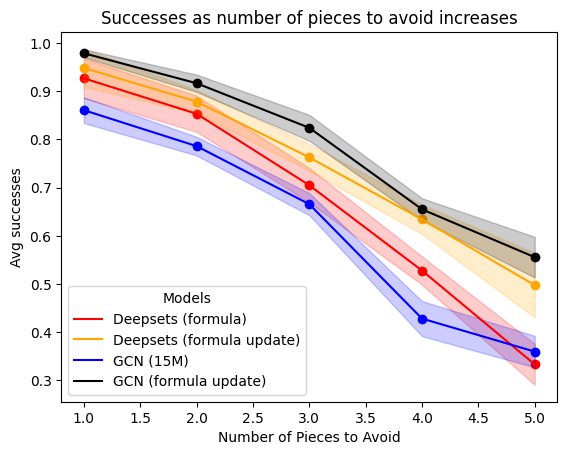

In [10]:
ablation_cols = ["Deepsets (formula)", "Deepsets (formula update)", "GCN (15M)", "GCN (formula update)"]
colors = ['red', 'orange', 'blue', 'black']

make_latest_ablation_graphs(ablation_cols, colors)

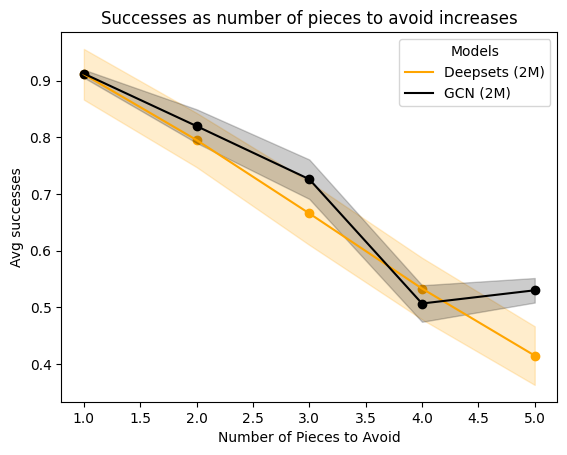

In [11]:
ablation_cols = ["Deepsets (2M)", "GCN (2M)"]
colors = ['orange', 'black']

make_latest_ablation_graphs(ablation_cols, colors)